# Measuring Pitch Usage Frequency in MIDI Files

In [1]:
from __future__ import division
import os
import glob
from collections import Counter

import midi
import numpy as np
import joblib

In [2]:
def compute_pitch_statistics(midi_file):
    """

    :param midi_file: str - path to a MIDI file
    :return:
    """
    try:
        pattern = midi.read_midifile(midi_file)
        return [
            event.get_pitch()
            for track in pattern
            for event in track if isinstance(event, midi.NoteEvent)
            ]
    except Exception as e:
        pass

In [3]:
pitch_statistics = joblib.Parallel(n_jobs=10, verbose=0)(
    joblib.delayed(compute_pitch_statistics)(midi_file)
    for midi_file in glob.glob(
        os.path.join(os.path.expanduser("~"), "Lab", "Data", "MIDIs", "*", "*.[mM][iI][dD]"))
)


counter = Counter()
for ps in pitch_statistics:
    counter.update(Counter(ps))
    

notes, frequencies = np.array(counter.keys()), np.array(counter.values())

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12, 6)
# mpl.rcParams['font.sans-serif'] = ['SimHei']  #指定默认字体, 解决中文显示问题

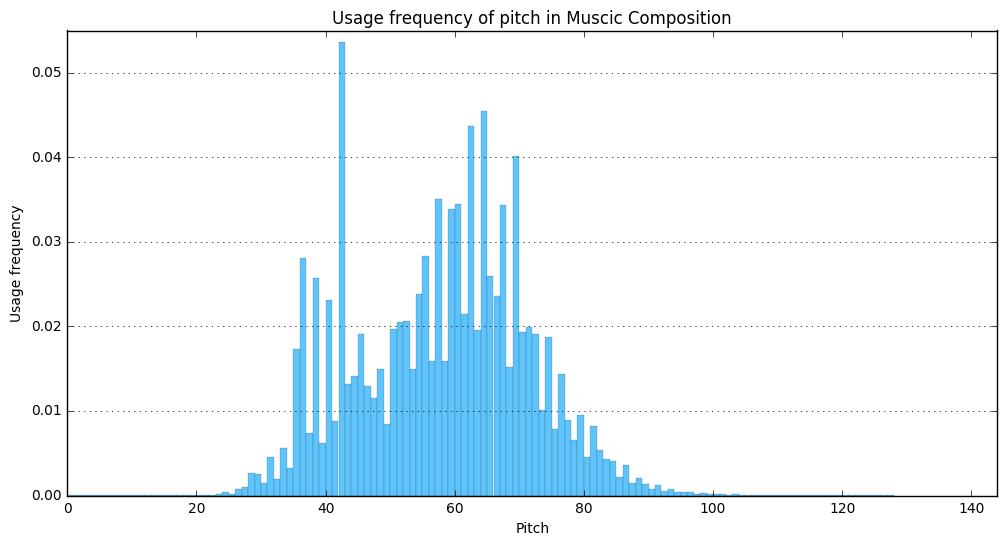

In [117]:
plt.bar(notes, frequencies / frequencies.sum(), width=1, color="#5fc4fc", linewidth=0.1)

plt.grid(axis="y")
plt.xlim([0, 144])
plt.ylim([0, 0.055])
plt.title("Usage frequency of pitch in Muscic Composition")
plt.xlabel("Pitch")
plt.ylabel("Usage frequency")

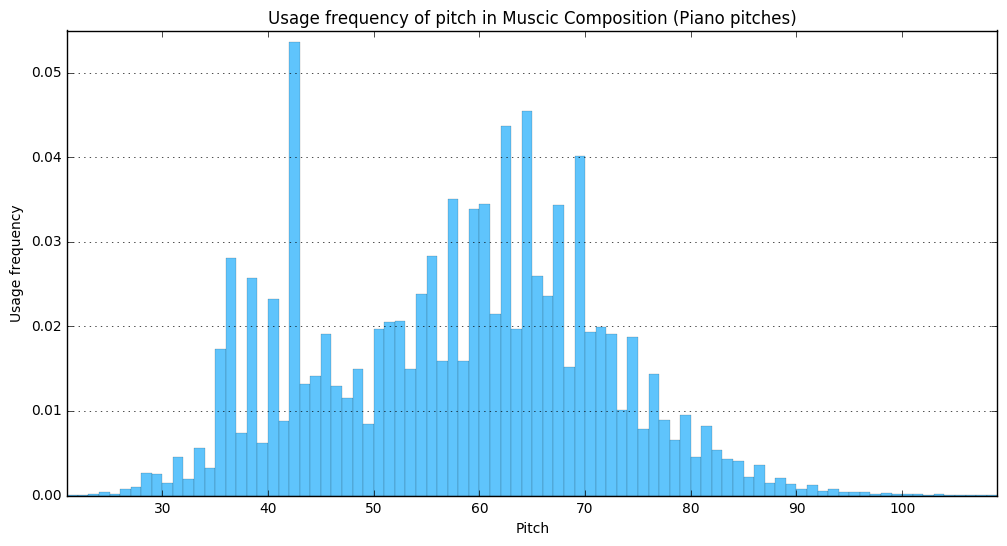

In [118]:
plt.bar(notes[21:109], frequencies[21:109] / frequencies[21:109].sum(), width=1, color="#5fc4fc", linewidth=0.1)

plt.grid(axis="y")
plt.xlim([21, 109])
plt.ylim([0, 0.055])
plt.title("Usage frequency of pitch in Muscic Composition (Piano pitches)")
plt.xlabel("Pitch")
plt.ylabel("Usage frequency")
plt.show()

In [123]:
piano_frequencies = frequencies[21: 109] / frequencies[21: 109].sum()
scientific_names = ["A0","A#0","B0","C1","C#1","D1","D#1","E1","F1","F#1","G1","G#1","A1","A#1","B1","C2","C#2","D2","D#2","E2","F2","F#2","G2","G#2","A2","A#2","B2","C3","C#3","D3","D#3","E3","F3","F#3","G3","G#3","A3","A#3","B3","C4","C#4","D4","D#4","E4","F4","F#4","G4","G#4","A4","A#4","B4","C5","C#5","D5","D#5","E5","F5","F#5","G5","G#5","A5","A#5","B5","C6","C#6","D6","D#6","E6","F6","F#6","G6","G#6","A6","A#6","B6","C7","C#7","D7","D#7","E7","F7","F#7","G7","G#7","A7","A#7","B7","C8"]
for name, frequency in zip(scientific_names, piano_frequencies):
    print(name, frequency)

('A0', 0.00010303542578920389)
('A#0', 6.6589526870013867e-05)
('B0', 0.00014487177774942202)
('C1', 0.00040650988654678623)
('C#1', 0.00022798130000885536)
('D1', 0.00080172932169918026)
('D#1', 0.0010207533514806555)
('E1', 0.0026584051671541941)
('F1', 0.002518280206261797)
('F#1', 0.0015044995801078444)
('G1', 0.0045275782818486069)
('G#1', 0.0019367012776660979)
('A1', 0.0056636766011375307)
('A#1', 0.0033089872583099197)
('B1', 0.017356668792275164)
('C2', 0.028130897148922342)
('C#2', 0.0074038811154622701)
('D2', 0.025765507354535675)
('D#2', 0.0062229159905134463)
('E2', 0.023193617617781263)
('F2', 0.008775657550793757)
('F#2', 0.053685586835022586)
('G2', 0.013145518149387208)
('G#2', 0.01418933513079465)
('A2', 0.019073326949535115)
('A#2', 0.012934056844767771)
('B2', 0.011486143612503556)
('C3', 0.015009461720086593)
('C#3', 0.0084878985401955886)
('D3', 0.019709105408458764)
('D#3', 0.020491016099325507)
('E3', 0.020698561950492255)
('F3', 0.015014342627815284)
('F#3', 0